# Regression and Other Stories: Simple least square regression

Linear least squares regression with a single predictor. See Chapters 6 and 7 in Regression and Other Stories.

----

#### Load Packages

In [1]:
using StatsPlots, GLM, Random, Distributions, DataFrames
using LaTeXStrings

#### Fitting a regression using a data frame in R

**Simulate fake data**

In [2]:
x = 1:20
n = length(x)
a = 0.2
b = 0.3
sigma = 0.5

# set the random seed to get reproducible results
# change the seed to experiment with variation due to random noise

Random.seed!(2141)
y = a .+ b .* x + rand(Normal(0,sigma), n);
fake = DataFrame(Dict(
        "y"=>y,
        "x"=>x
        ));

**Linear least squares regression**

In [3]:
fit = lm(@formula(y ~ x), fake)
display(fit);

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.11647     0.304151   0.38    0.7063  -0.522527   0.755467
x            0.304379    0.02539   11.99    <1e-09   0.251037   0.357722
────────────────────────────────────────────────────────────────────────

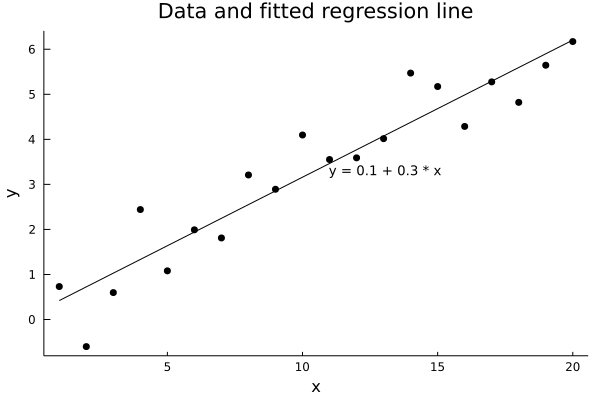

In [4]:
scatter(
    x,y,
    title="Data and fitted regression line",
    xlabel="x", ylabel="y",
    color=:black,
    legend=false,
    grid=false
)

plot!(
    x,
    x-> coef(fit)[1] + coef(fit)[2] * x,
    color=:black
)
annotate!(
    mean(x), coef(fit)[1] + coef(fit)[2] * mean(x),
    text(
        string("   y = ", round(coef(fit)[1], digits=1),
            " + ", round(coef(fit)[2], digits=2), " * x"
            ), 
        :left, 9
    )
)

#### Formulating comparisons as regression models

**Simulate fake data**

In [5]:
n_0 = 20
y_0 = rand(Normal(2.0, 5.0), n_0)
y_0 = round.(y_0,digits=1)
y_0

20-element Vector{Float64}:
  0.7
  3.1
  6.2
 -2.9
  8.8
 -3.8
  9.8
  4.0
  4.2
 11.7
 -1.9
 -2.3
 -4.4
 -8.1
  8.0
  3.8
 -4.7
 -0.4
  1.0
 -3.5

In [6]:
round(mean(y_0),digits=2)

1.46

In [7]:
round(std(y_0)/sqrt(n),digits=2)

1.24

**Estimating the mean is the same as regressing on a constant term**

In [8]:
data = DataFrame(Dict("y_0"=>y_0))
display(lm(@formula(y_0 ~ 1), data))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y_0 ~ 1

Coefficients:
────────────────────────────────────────────────────────────────────
             Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────
(Intercept)  1.465     1.23575  1.19    0.2504   -1.12145    4.05145
────────────────────────────────────────────────────────────────────

**Simulate fake data**

In [9]:
n_1 = 30
y_1 = rand(Normal(8, 5), n_1)
diff = mean(y_1) - mean(y_0)
se_0 = std(y_0) / sqrt(n_0)
se_1 = std(y_1) / sqrt(n_1)
se = sqrt(se_0^2 + se_1^2)
println(diff)

7.340478163727811


In [10]:
println(se)

1.4265688525582274


**Estimating a difference is the same as regressing on an indicator variable**

In [11]:
n  = n_0 + n_1
y = vcat(y_0, y_1)
x = vcat( zeros(n_0), ones(n_1))
data = DataFrame(Dict("x"=>x,"y"=>y))
fit = lm(@formula(y ~ x), data)
display(fit);

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
──────────────────────────────────────────────────────────────────────
               Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────
(Intercept)  1.465       1.03192  1.42    0.1622  -0.609823    3.53982
x            7.34048     1.33221  5.51    <1e-05   4.66189    10.0191
──────────────────────────────────────────────────────────────────────

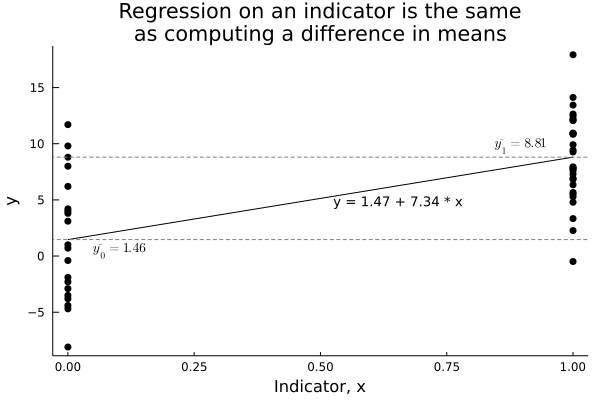

In [12]:
scatter(
    x,y,
    title="Regression on an indicator is the same\nas computing a difference in means",
    xlabel="Indicator, x", ylabel="y",
    color=:black,
    legend=false,
    grid=false
)

plot!(
    x,
    x-> coef(fit)[1] + coef(fit)[2] * x,
    color=:black
)
annotate!(
    0.5, -1 + coef(fit)[1] + coef(fit)[2] * mean(x),
    text(
        string("   y = ", round(coef(fit)[1], digits=2),
            " + ", round(coef(fit)[2], digits=2), " * x"
            ), 
        :left, 9
    )
)
annotate!(0.05, -1 + mean(y_0),
    text(LaTeXString("\$\\bar{y_0} = $(round(mean(y_0),digits=2)) \$"),
        9, :left
        )
)
annotate!(0.95, 1 + mean(y_1),
    text(LaTeXString("\$\\bar{y_1} = $(round(mean(y_1),digits=2)) \$"),
        9,:right
        )
)


hline!([mean(y_0), mean(y_1)], color=:gray50, linestyle=:dash)